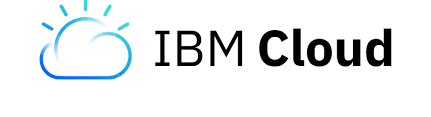

# CASE STUDY - Unsupervised Learning


In [2]:
!pip install seaborn --upgrade


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Seaborn Installed Successfully!")


✅ Seaborn Installed Successfully!


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn's built-in style settings
sns.set_theme(style="darkgrid")  # Alternatives: "whitegrid", "dark", "white", "ticks"

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

print("✅ Seaborn theme applied successfully!")


✅ Seaborn theme applied successfully!


In [3]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
import seaborn as sns
sns.set_theme(style="darkgrid")  # Alternative: "whitegrid", "ticks", "dark"


In [3]:
import pandas as pd

# Define the exact file path
file_path = r"D:\Career\Enterprise workflow\Clustering-Case-Study-Local\data\aavail-target.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Confirm successful loading
print("✅ Dataset Loaded Successfully!")

# Display the first few rows
print(df.head())


✅ Dataset Loaded Successfully!
   customer_id  is_subscriber        country  age     customer_name  \
0            1              1  united_states   21        Kasen Todd   
1            2              0      singapore   30      Ensley Garza   
2            3              0  united_states   21     Lillian Carey   
3            4              1  united_states   20  Beau Christensen   
4            5              1      singapore   21    Ernesto Gibson   

    subscriber_type  num_streams  
0    aavail_premium           23  
1  aavail_unlimited           12  
2    aavail_premium           22  
3      aavail_basic           19  
4    aavail_premium           23  


In [4]:
# Display dataset information
print("\n📊 Dataset Information:")
print(df.info())

# Check for missing values
print("\n🔍 Missing Values in Each Column:")
print(df.isnull().sum())

# Display column names
print("\n📂 Dataset Columns:")
print(df.columns.tolist())



📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1000 non-null   int64 
 1   is_subscriber    1000 non-null   int64 
 2   country          1000 non-null   object
 3   age              1000 non-null   int64 
 4   customer_name    1000 non-null   object
 5   subscriber_type  1000 non-null   object
 6   num_streams      1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB
None

🔍 Missing Values in Each Column:
customer_id        0
is_subscriber      0
country            0
age                0
customer_name      0
subscriber_type    0
num_streams        0
dtype: int64

📂 Dataset Columns:
['customer_id', 'is_subscriber', 'country', 'age', 'customer_name', 'subscriber_type', 'num_streams']


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn's built-in style settings
sns.set_theme(style="darkgrid")  # Alternatives: "whitegrid", "dark", "white", "ticks"

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

print("✅ Seaborn theme applied successfully!")


✅ Seaborn theme applied successfully!


In [22]:
import os
import joblib
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns  # ✅ Import Seaborn

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import BayesianGaussianMixture
from sklearn.svm import SVC
import imblearn.pipeline as pl
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, SVMSMOTE


## Synopsis

  > We are now going to predict customer retention.  There are many models and many transforms to consider.  Use your
    knowledge of pipelines and functions to ensure that your code makes it easy to compare and iterate over.  
    
  > Marketing has asked you to make a report on customer retention.  They would like you to come up with information     that can be used to improve current marketing strategy efforts.  The current plan is for marketing at AAVAiL to
    collect more features on subscribers the and they would like to use your report as a proof-of-concept in order to     get buyin for this effort.
  
## Outline

1. Create a churn prediction baseline model
2. Use clustering as part of your prediction pipeline
3. Run and experiment to see if re-sampling techniques improve your model

## Data

Here we load the data as we have already done.

`aavail-target.csv`

In [23]:
# Define the correct file path
file_path = r"D:\Career\Enterprise workflow\Clustering-Case-Study-Local\data\aavail-target.csv"

# Load the dataset
df = pd.read_csv(file_path)

print("✅ Dataset Loaded Successfully!")

# Pull out the target variable
_y = df.pop('is_subscriber')

# Convert target: 0 (not subscriber) → 1 (churn), 1 (subscriber) → 0 (active)
y = np.zeros(_y.size)
y[_y == 0] = 1  # Mark churned customers as 1

# Drop unnecessary columns
df.drop(columns=['customer_id', 'customer_name'], inplace=True)

# Display the first few rows
print(df.head())

✅ Dataset Loaded Successfully!
         country  age   subscriber_type  num_streams
0  united_states   21    aavail_premium           23
1      singapore   30  aavail_unlimited           12
2  united_states   21    aavail_premium           22
3  united_states   20      aavail_basic           19
4      singapore   21    aavail_premium           23


### QUESTION 1

Using the train_test_split() function, create a stratified train test split of the data

In [24]:
## YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Define stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df,  # Features
    y,   # Target (churned vs. non-churned)
    test_size=0.2,  # 20% test data
    stratify=y,  # Ensures class distribution is maintained
    random_state=42  # For reproducibility
)

# Confirm the split
print("✅ Stratified Train-Test Split Completed!")
print(f"Training Set Size: {X_train.shape}, Test Set Size: {X_test.shape}")


✅ Stratified Train-Test Split Completed!
Training Set Size: (800, 4), Test Set Size: (200, 4)


In [25]:
import numpy as np

# Check distribution in training set
print("📊 Training Set Class Distribution:")
print(np.bincount(y_train.astype(int)))  # Counts for [Active (0), Churned (1)]

# Check distribution in test set
print("\n📊 Test Set Class Distribution:")
print(np.bincount(y_test.astype(int)))  # Counts for [Active (0), Churned (1)]


📊 Training Set Class Distribution:
[569 231]

📊 Test Set Class Distribution:
[142  58]


### QUESTION 2

Create a baseline model.  We are going to test whether clustering followed by a model improves the results.  Then, we will test whether re-sampling techniques provide improvements.  Use a pipeline or another method, but create a baseline model given the data. Here is the ColumnTransformer we have used before:

In [26]:
## preprocessing pipeline
numeric_features = ['age', 'num_streams']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['country', 'subscriber_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encod', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [27]:
# Define numeric and categorical preprocessing
numeric_features = ['age', 'num_streams']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize features
])

categorical_features = ['country', 'subscriber_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing categorical values
    ('encoder', OrdinalEncoder())  # Convert categories to numbers
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [28]:
# Create a Random Forest classifier (or change it to another model like Logistic Regression)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that integrates preprocessing and model training
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the test set
y_pred = pipe.predict(X_test)

# Evaluate model performance using F1-score
print("✅ f1_score:", round(f1_score(y_test, y_pred, average='binary'), 3))


✅ f1_score: 0.574


### QUESTION 3

The next part is to create a version of the classifier that uses identified clusters.  Here is a class to get you started.  It is a transformer like those that we have been working with.  There is an example of how to use it just below.  In this example 4 clusters were specified and their one-hot encoded versions were appended to the feature matrix.  Now using pipelines and/or functions compare the performance using cluster profiling as part of your matrix to the baseline.  You may compare multiple models and multiple clustering algorithms here.

In [29]:
class KmeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters
        self.km = KMeans(n_clusters=self.n_clusters, n_init=20)
        
    def transform(self, X, *_):
        labels = self.km.predict(X)
        return np.hstack((X, labels.reshape(-1, 1)))

    def fit(self, X, y=None, *_):
        self.km.fit(X)
        labels = self.km.predict(X)
        self.silhouette_score = round(silhouette_score(X, labels, metric='mahalanobis'), 3)
        return self

class GmmTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters
        self.gmm = BayesianGaussianMixture(n_components=self.n_clusters, covariance_type='full',
                                           max_iter=500, n_init=10, warm_start=True)        
    def transform(self, X,*_):
        probs = self.gmm.predict_proba(X) + np.finfo(float).eps
        return np.hstack((X, probs))
        
    def fit(self, X, y=None, *_):
        self.gmm.fit(X)
        labels = self.gmm.predict(X)
        self.silhouette_score = round(silhouette_score(X, labels, metric='mahalanobis'), 3)
        return self
    

    
## example for kmeans
preprocessor.fit(X_train)
X_train_pre = preprocessor.transform(X_train)    
kt = KmeansTransformer(4)
kt.fit(X_train_pre)
X_train_kmeans = kt.transform(X_train_pre)
print(X_train_pre.shape)
print(X_train_kmeans.shape)   
    
## example for GMM  
preprocessor.fit(X_train)
X_train_pre = preprocessor.transform(X_train)    
gt = GmmTransformer(4)
gt.fit(X_train_pre)
X_train_gmm = gt.transform(X_train_pre)
print(X_train_pre.shape)  
print(X_train_gmm.shape)

(800, 4)
(800, 5)
(800, 4)
(800, 8)


In [38]:
# ✅ KMeans Transformer
class KmeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters
        self.km = KMeans(n_clusters=self.n_clusters, n_init=20, random_state=42)
        
    def transform(self, X, *_):
        labels = self.km.predict(X)
        return np.hstack((X, labels.reshape(-1, 1)))

    def fit(self, X, y=None, *_):
        self.km.fit(X)
        labels = self.km.predict(X)
        self.silhouette_score = round(silhouette_score(X, labels, metric='euclidean'), 3)
        return self

# ✅ Gaussian Mixture Model (GMM) Transformer
class GmmTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters
        self.gmm = BayesianGaussianMixture(n_components=self.n_clusters, covariance_type='full',
                                           max_iter=500, n_init=10, warm_start=True, random_state=42)        
    def transform(self, X, *_):
        probs = self.gmm.predict_proba(X) + np.finfo(float).eps
        return np.hstack((X, probs))
        
    def fit(self, X, y=None, *_):
        self.gmm.fit(X)
        labels = self.gmm.predict(X)
        self.silhouette_score = round(silhouette_score(X, labels, metric='euclidean'), 3)
        return self


In [39]:
def run_clustering_pipeline(umodel):
    """
    Evaluates different Pipelines comprised of:
      - Preprocessing Transformer
      - Clustering Transformer (KMeans or GMM)
      - Classifier (Random Forest)

    INPUT : 'gmm' or 'kmeans' to select the clustering model
    OUTPUT : List of F1 scores for different cluster sizes
    """
    
    fscores = []  # Stores F1-scores for different cluster sizes
    
    for n_clusters in np.arange(3, 8):  # Iterate over cluster sizes (3 to 7)

        # ✅ Create an instance of the binary classifier (Random Forest)
        clf = RandomForestClassifier(n_estimators=100, random_state=42)

        if umodel == 'gmm':
            # ✅ Create an instance of the GMM transformer with n_clusters clusters
            cluster = GmmTransformer(n_clusters=n_clusters)  
        elif umodel == 'kmeans':
            # ✅ Create an instance of the KMeans transformer with n_clusters clusters
            cluster = KmeansTransformer(n_clusters=n_clusters)  
        else:
            raise Exception("Invalid clustering model. Use 'gmm' or 'kmeans'.")

        # ✅ Create a Pipeline combining Preprocessing, Clustering, and Classifier
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('clustering', cluster),
            ('classifier', clf)
        ])
        
        # ✅ Fit the pipeline on the training set
        pipe.fit(X_train, y_train)

        # ✅ Predict on the test set
        y_pred = pipe.predict(X_test)

        # ✅ Compute the F1-score and store it
        score = round(f1_score(y_test, y_pred, average='binary'), 3)
        fscores.append(score)
    
    return fscores


In [40]:
## Run the different iterations for KMeans and GMM
cp_results = {}
cp_results['kmeans'] = run_clustering_pipeline('kmeans')
cp_results['gmm'] = run_clustering_pipeline('gmm')

## ✅ Display results in a DataFrame
df_cp = pd.DataFrame(cp_results)
df_cp["n_clusters"] = [str(i) for i in np.arange(3, 8)]
df_cp.set_index("n_clusters", inplace=True)

# ✅ Show results
print("✅ Clustering Performance Comparison:")
print(df_cp.head(n=10))


✅ Clustering Performance Comparison:
            kmeans    gmm
n_clusters               
3            0.552  0.525
4            0.544  0.522
5            0.586  0.534
6            0.566  0.513
7            0.549  0.542


## QUESTION 4

Run an experiment to see if you can you improve on your workflow with the addition of re-sampling techniques? For instance, you can copy the structure of the function created in the previous question and add a re-sampling transformer to the pipeline.

In [36]:
def run_clustering_pipeline(umodel):
    """
    Evaluates different Pipelines comprised of:
      - Preprocessing Transformer
      - Clustering Transformer (KMeans or GMM)
      - Re-Sampling Transformer (SMOTE)
      - Classifier (Random Forest)

    INPUT : 'gmm' or 'kmeans' to select the clustering model
    OUTPUT : List of F1 scores for different cluster sizes
    """
    
    fscores = []  # Stores F1-scores for different cluster sizes
    
    for n_clusters in np.arange(3, 8):  # Iterate over cluster sizes (3 to 7)

        # ✅ Create an instance of the binary classifier (Random Forest)
        clf = RandomForestClassifier(n_estimators=100, random_state=42)

        if umodel == 'gmm':
            # ✅ Create an instance of the GMM transformer with n_clusters clusters
            cluster = GmmTransformer(n_clusters=n_clusters)  
        elif umodel == 'kmeans':
            # ✅ Create an instance of the KMeans transformer with n_clusters clusters
            cluster = KmeansTransformer(n_clusters=n_clusters)  
        else:
            raise Exception("Invalid clustering model. Use 'gmm' or 'kmeans'.")

        # ✅ Create a Pipeline combining Preprocessing, Clustering, SMOTE, and Classifier
        pipe = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('clustering', cluster),
            ('resampling', SMOTE(random_state=42)),  # ✅ Apply SMOTE to balance the dataset
            ('classifier', clf)
        ])
        
        # ✅ Fit the pipeline on the training set
        pipe.fit(X_train, y_train)

        # ✅ Predict on the test set
        y_pred = pipe.predict(X_test)

        # ✅ Compute the F1-score and store it
        score = round(f1_score(y_test, y_pred, average='binary'), 3)
        fscores.append(score)
    
    return fscores


In [37]:
## Run the different iterations for KMeans and GMM with SMOTE
cp_results = {}
cp_results['kmeans_smote'] = run_clustering_pipeline('kmeans')
cp_results['gmm_smote'] = run_clustering_pipeline('gmm')

## ✅ Display results in a DataFrame
df_cp = pd.DataFrame(cp_results)
df_cp["n_clusters"] = [str(i) for i in np.arange(3, 8)]
df_cp.set_index("n_clusters", inplace=True)

# ✅ Show results
print("✅ Clustering with Re-Sampling Performance Comparison:")
print(df_cp.head(n=10))


✅ Clustering with Re-Sampling Performance Comparison:
            kmeans_smote  gmm_smote
n_clusters                         
3                  0.581      0.547
4                  0.560      0.528
5                  0.562      0.535
6                  0.560      0.544
7                  0.576      0.551
